In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

# Imputing missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[['LoanAmount', 'Loan_Amount_Term']] = num_imputer.fit_transform(df[['LoanAmount', 'Loan_Amount_Term']])

# Imputing missing values for categorical columns with mode
# First, calculate the mode (most frequent value) for each column
cat_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any missing values left
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df["Loan_Status"] = (df["Loan_Status"] == "Y").astype(int)
df = df.drop(columns=["Loan_ID"], axis=1)
# In dependents column, there is a value 3+ which is not a number. So, we need to replace it with a number.
df["Dependents"] = df["Dependents"].replace("3+", 3)
df["Dependents"] = df["Dependents"].astype(float)

In [46]:
# df = df.fillna(df.mean())

# # Fill missing values in binary columns with the most common value
# cols = ["Gender", "Married", "Self_Employed"]
# for col in cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\Ansari\AppData\Local\Temp\ipykernel_9004\114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [10]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Dependents","Education","Self_Employed", "Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,0


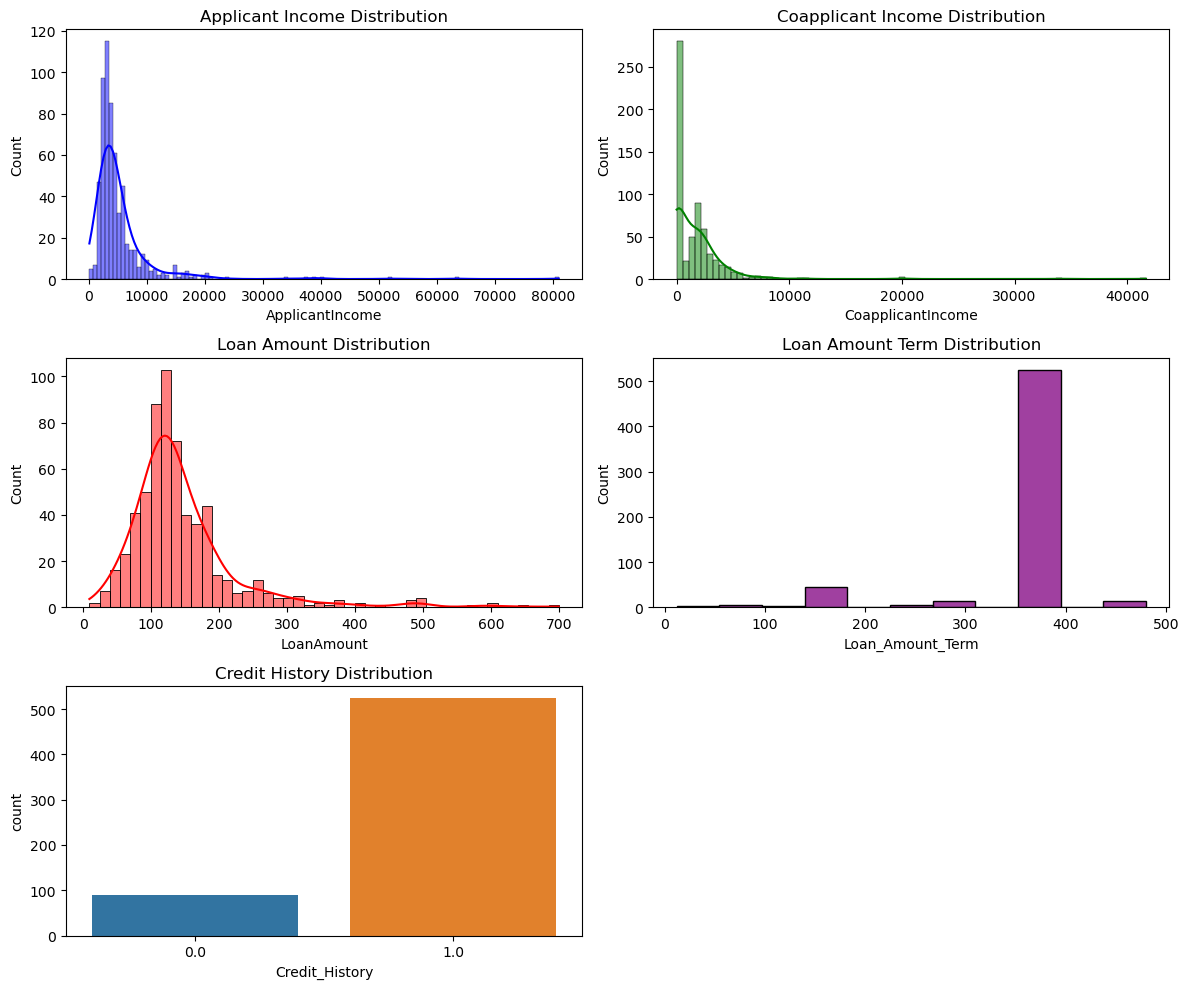

In [11]:
# Setting up the figure size and background color
plt.figure(figsize=(12, 10), facecolor='white')

# Plotting distributions of numerical variables
plt.subplot(3, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='blue')
plt.title('Applicant Income Distribution')

plt.subplot(3, 2, 2)
sns.histplot(df['CoapplicantIncome'], kde=True, color='green')
plt.title('Coapplicant Income Distribution')

plt.subplot(3, 2, 3)
sns.histplot(df['LoanAmount'], kde=True, color='red')
plt.title('Loan Amount Distribution')

plt.subplot(3, 2, 4)
sns.histplot(df['Loan_Amount_Term'], kde=False, color='purple')
plt.title('Loan Amount Term Distribution')

plt.subplot(3, 2, 5)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History Distribution')

plt.tight_layout()
plt.show()

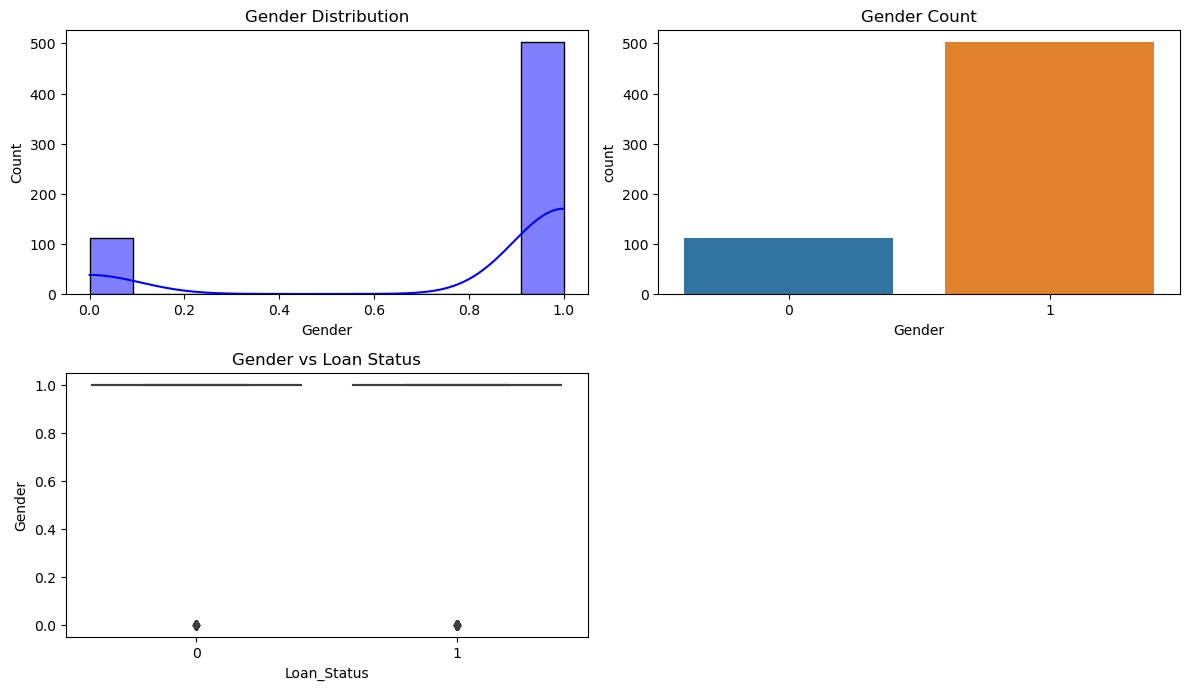

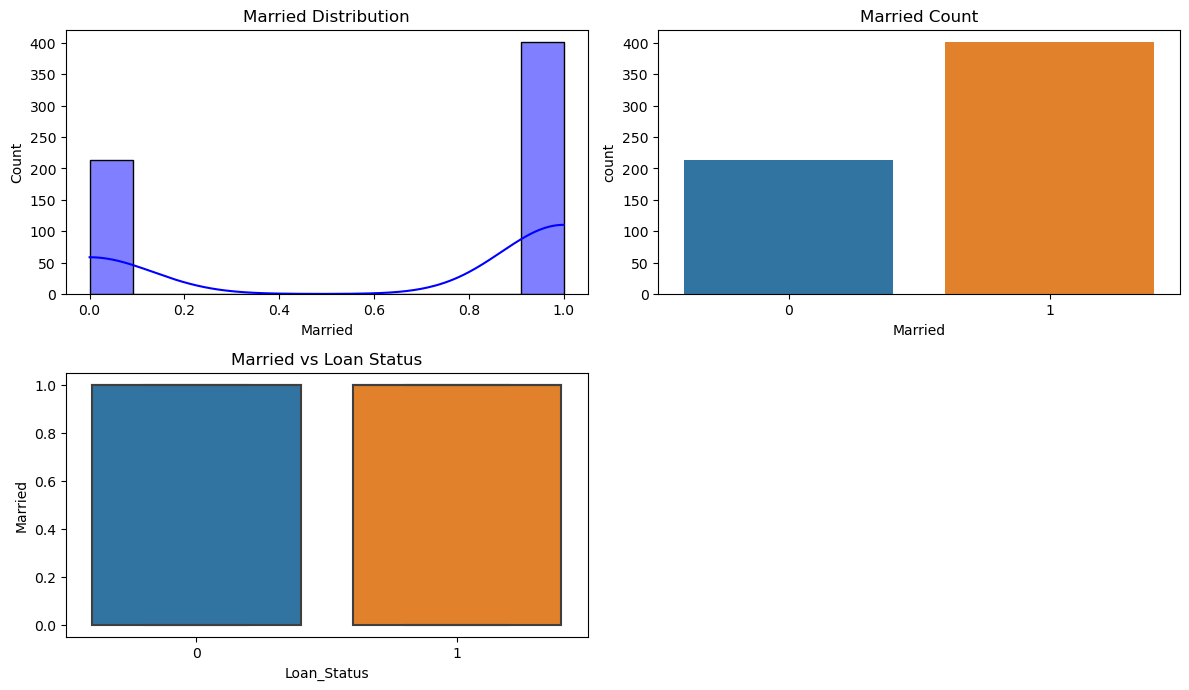

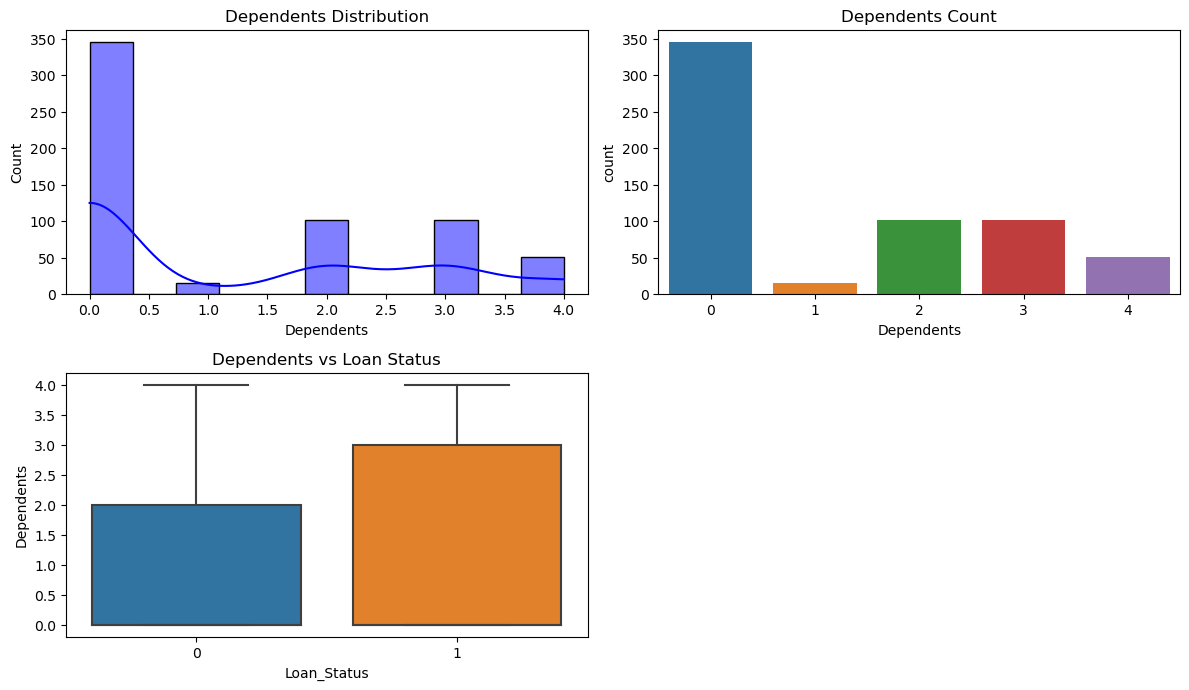

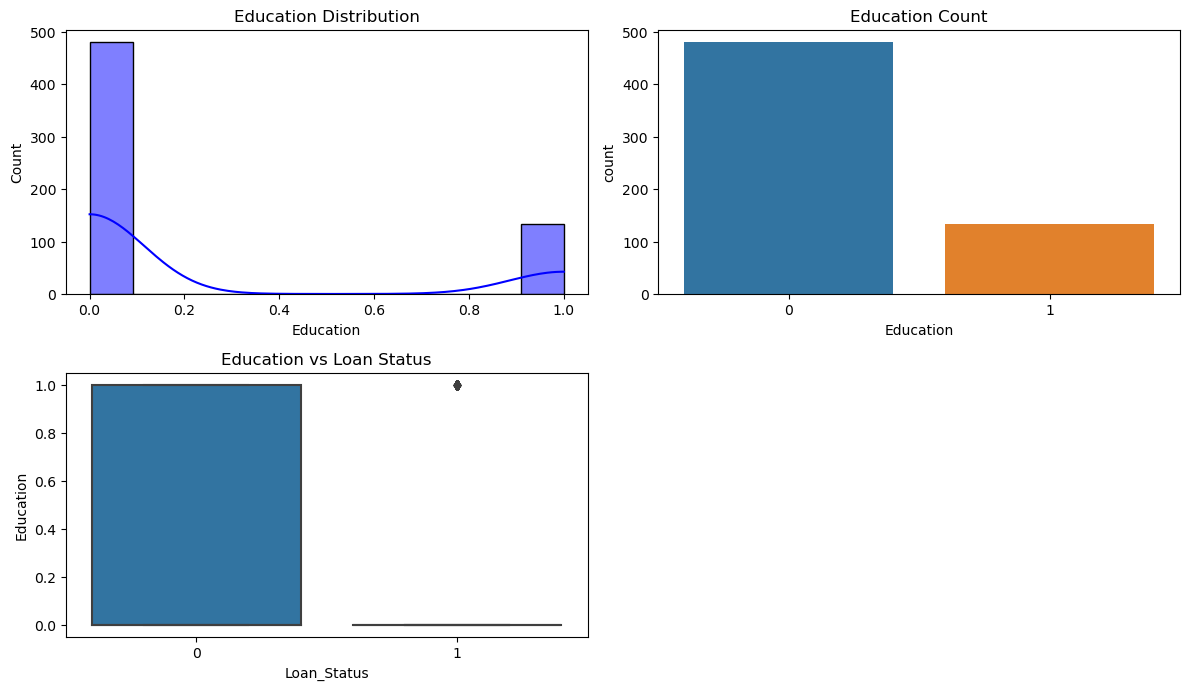

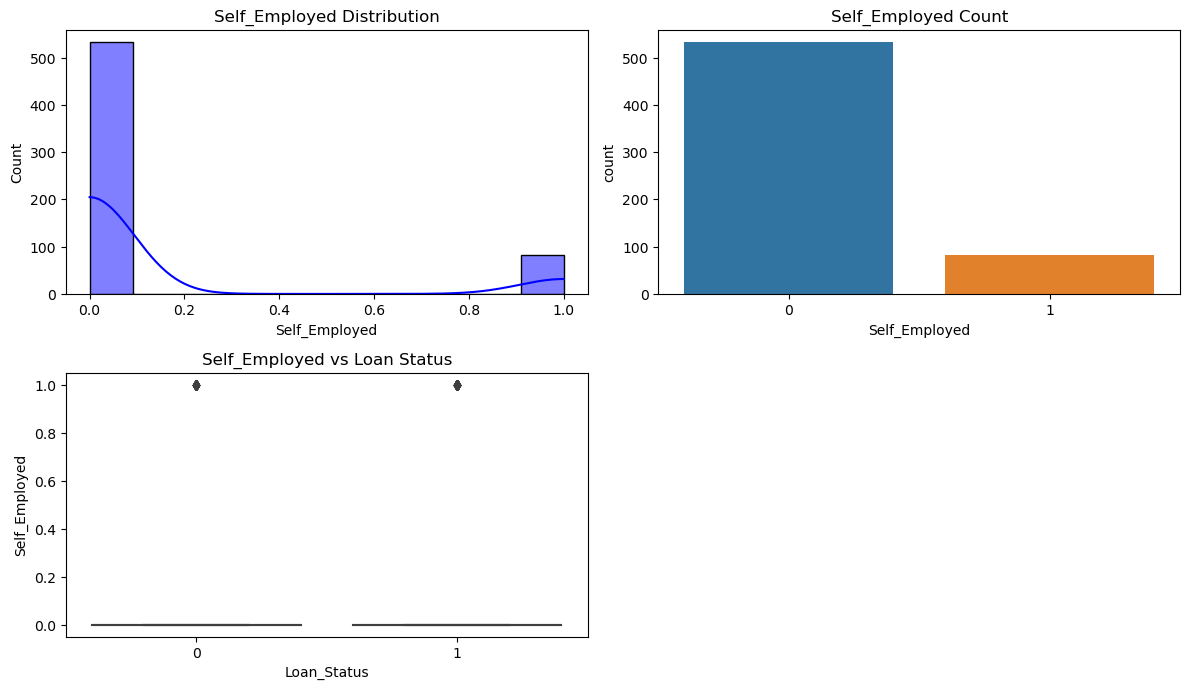

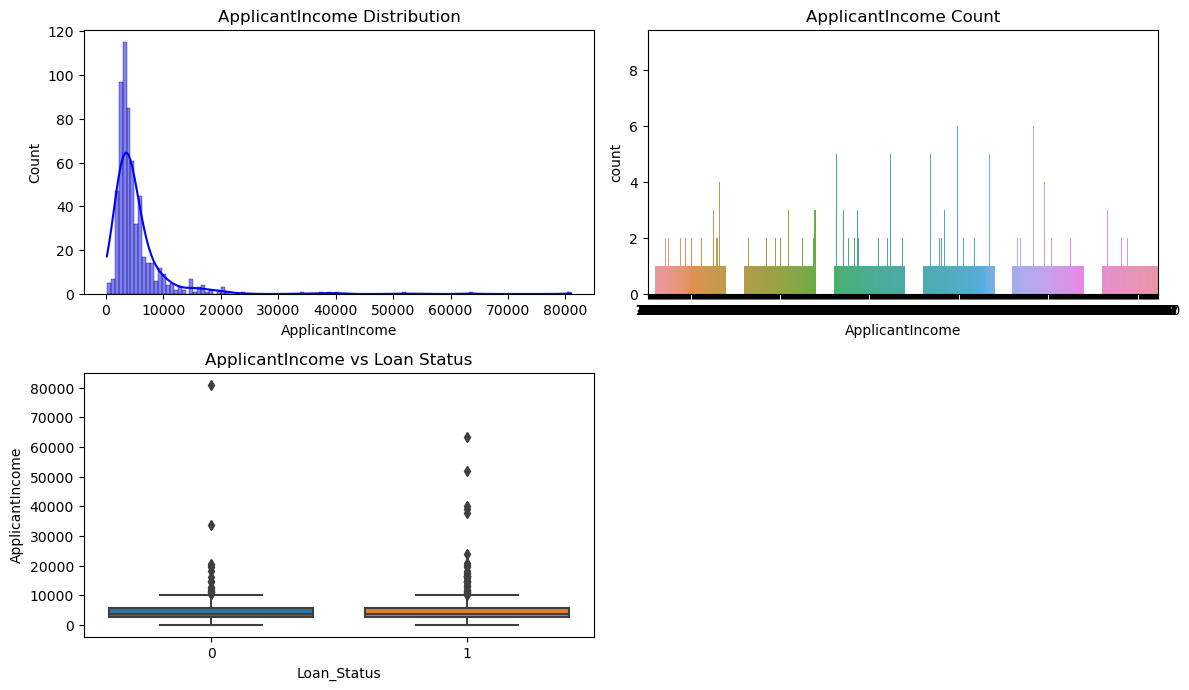

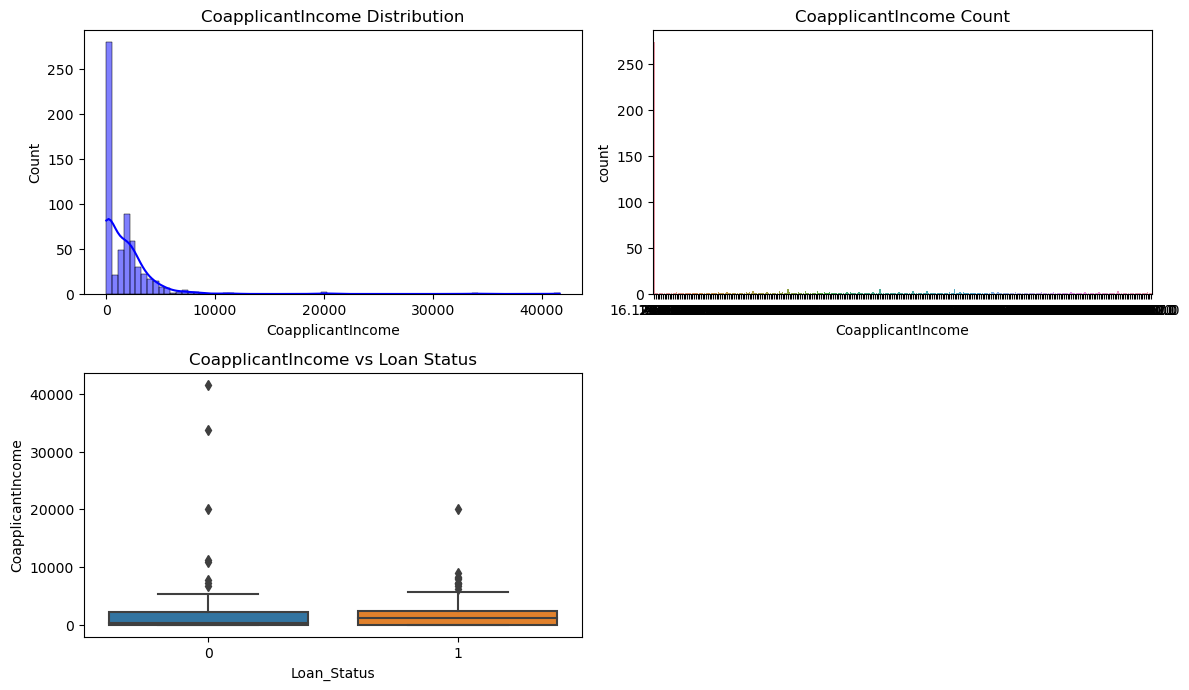

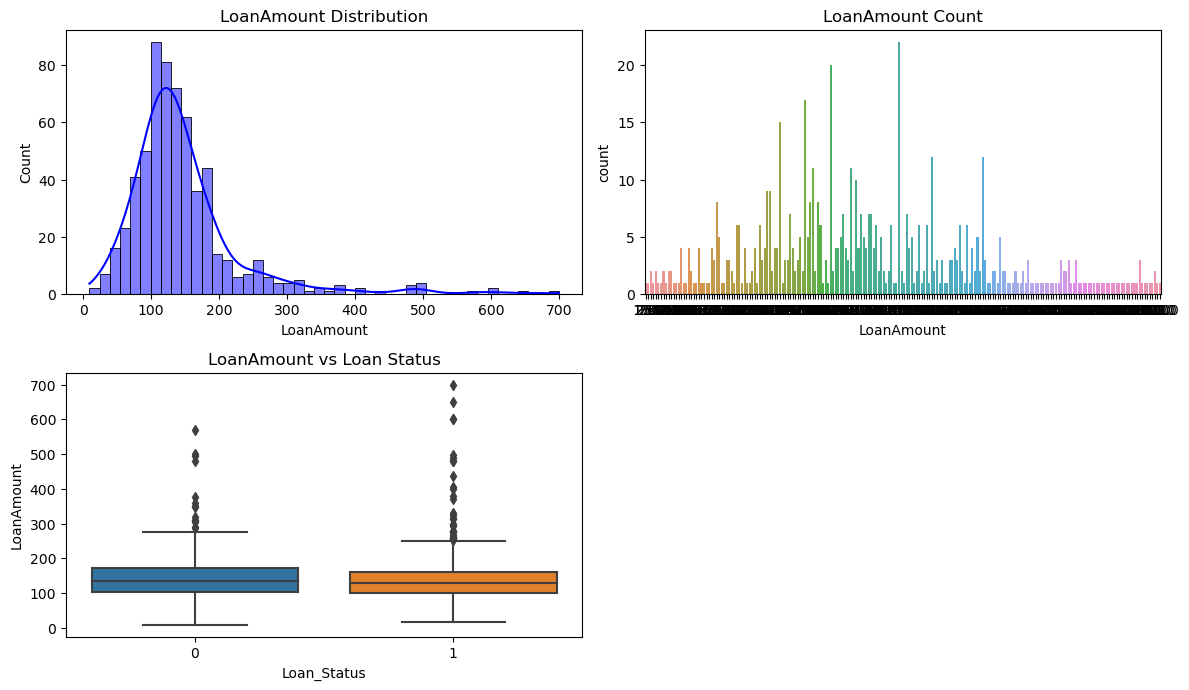

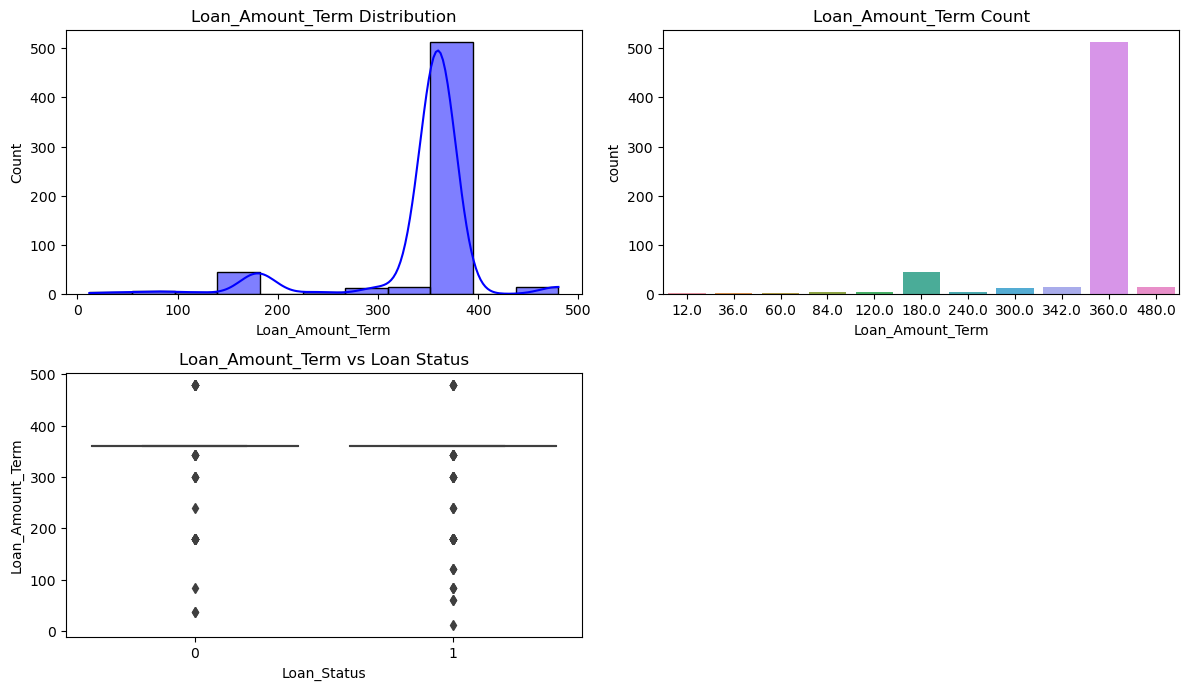

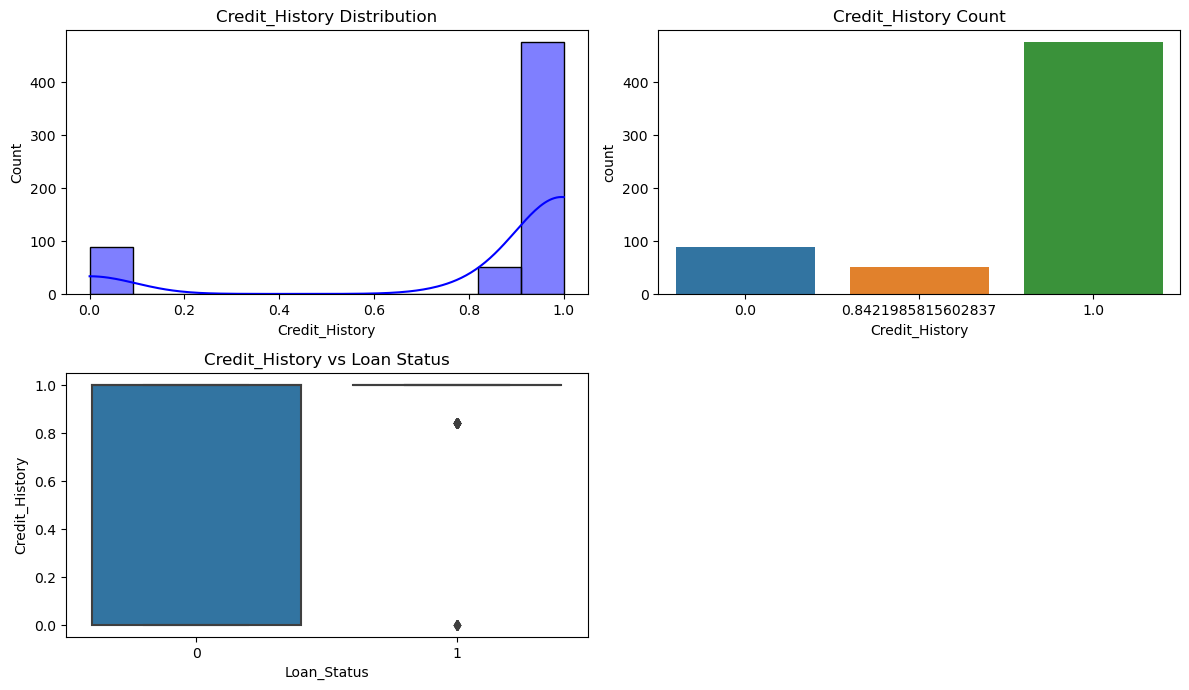

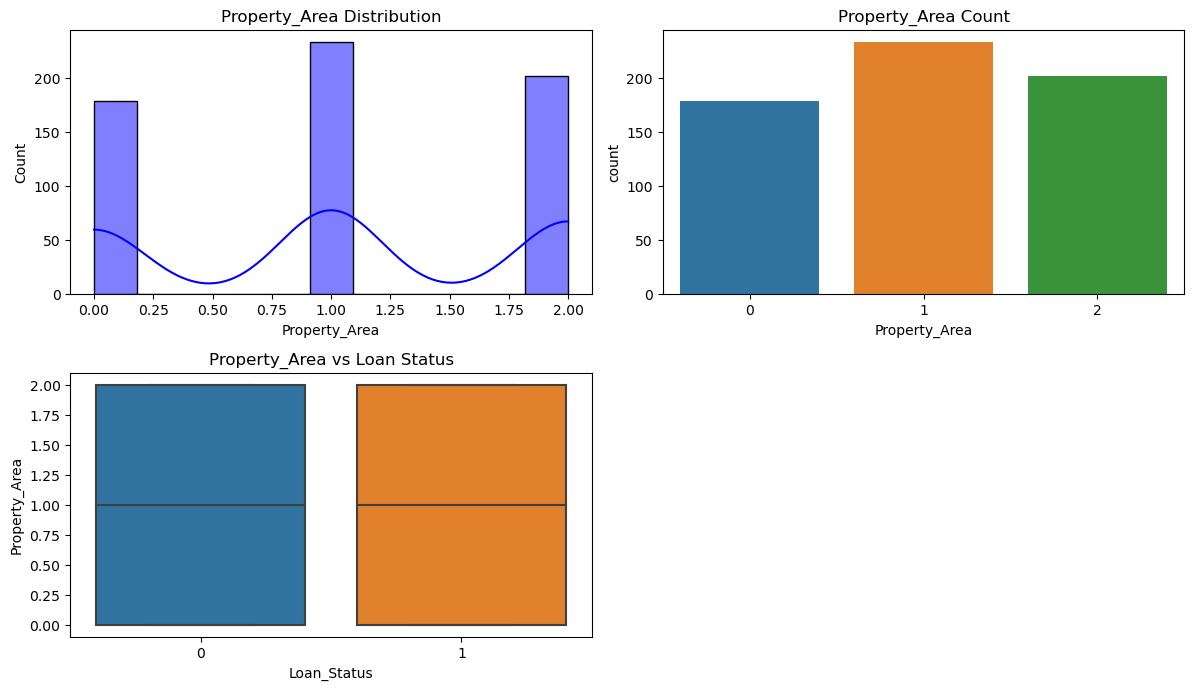

In [60]:
for label in df.columns[:-1]:
  #plot 3 different plots for each feature in one row

  # Setting up the figure size and background color
  plt.figure(figsize=(12, 10), facecolor='white')

  # Plotting distributions of numerical variables
  plt.subplot(3, 2, 1)
  sns.histplot(df[label], kde=True, color='blue')
  plt.title(label + ' Distribution')

  plt.subplot(3, 2, 2)
  sns.countplot(x=label, data=df)
  plt.title(label + ' Count')

  plt.subplot(3, 2, 3)
  sns.boxplot(x='Loan_Status', y=label, data=df)
  plt.title(label + ' vs Loan Status')

  plt.tight_layout()
  plt.show()

